In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import random as rand
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

%matplotlib inline

C:\Users\Hicham\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Hicham\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
Train = pd.read_csv('train.csv')

In [4]:
X_test = pd.read_csv('New folder/test.csv')

In [8]:
y_train = Train.TARGET
X_train = Train.drop(['TARGET', 'ID'], axis=1)
X_test =  X_test.drop(['ID'], axis=1)

In [9]:
bestFeatures = ['var38','var15', 'saldo_medio_var5_ult3','saldo_medio_var5_hace3','num_var45_ult3','saldo_var30', 
                'saldo_medio_var5_hace2','num_var45_hace3','saldo_var42','num_var45_hace2', 'num_var22_ult3',
                'saldo_medio_var5_ult1','saldo_var5','num_var45_ult1', 'num_med_var45_ult3','num_var22_hace2',
                'num_var22_hace3','var36','num_var22_ult1','num_meses_var39_vig_ult3']

In [10]:
X_train = X_train[bestFeatures]
X_test = X_test[bestFeatures]

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
["RandomForest_42_[('n_estimators', 1100), ('criterion', 'gini'), ('max_depth', 10), ('min_samples_leaf', 11)]",
 "RandomForest_43_[('n_estimators', 1450), ('criterion', 'entropy'), ('max_depth', 10), ('min_samples_leaf', 7)]",
 "RandomForest_39_[('n_estimators', 350), ('criterion', 'gini'), ('max_depth', 10), ('min_samples_leaf', 7)]",
 "RandomForest_36_[('n_estimators', 1400), ('criterion', 'entropy'), ('max_depth', 11), ('min_samples_leaf', 9)]",
 "RandomForest_41_[('n_estimators', 500), ('criterion', 'gini'), ('max_depth', 10), ('min_samples_leaf', 9)]",
 "RandomForest_37_[('n_estimators', 150), ('criterion', 'entropy'), ('max_depth', 13), ('min_samples_leaf', 9)]",
 "RandomForest_40_[('n_estimators', 50), ('criterion', 'entropy'), ('max_depth', 11), ('min_samples_leaf', 11)]",
 "GradientBoosting_30_[('n_estimators', 350), ('learning_rate', 0.03), ('max_depth', 2)]",
 "GradientBoosting_33_[('n_estimators', 300), ('learning_rate', 0.02), ('max_depth', 2)]",
 "AdaBoost_13_[('n_estimators', 600), ('learning_rate', 0.05)]",
 "AdaBoost_1_[('n_estimators', 450), ('learning_rate', 0.05)]",
 "AdaBoost_16_[('n_estimators', 750), ('learning_rate', 0.05)]"]

In [12]:
%%time
RF1 = RandomForestClassifier(n_estimators = 1100, criterion = 'gini', max_depth = 10, min_samples_leaf = 11)
RF2 = RandomForestClassifier(n_estimators = 1450, criterion = 'entropy', max_depth = 10, min_samples_leaf = 7)
RF3 = RandomForestClassifier(n_estimators = 350, criterion = 'gini', max_depth = 11, min_samples_leaf = 7)
RF4 = RandomForestClassifier(n_estimators = 1400, criterion = 'entropy', max_depth = 10, min_samples_leaf = 9)
RF5 = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 10, min_samples_leaf = 9)
RF6 = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', max_depth = 13, min_samples_leaf = 9)
RF7 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 11, min_samples_leaf = 11)
Grad1 = GradientBoostingClassifier(n_estimators = 350, learning_rate = 0.03, max_depth = 2)
Grad2 = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.02, max_depth = 2)
Ada1 = AdaBoostClassifier(n_estimators = 600, learning_rate = 0.05)
Ada2 = AdaBoostClassifier(n_estimators = 450, learning_rate = 0.05)
Ada3 = AdaBoostClassifier(n_estimators = 750, learning_rate = 0.05)

Wall time: 22 ms


In [13]:
classifiers = [RF1, RF2, RF3, RF4, RF5, RF6, RF7, Grad1, Grad2, Ada1, Ada2, Ada3]

In [14]:
%%time
preds = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    preds.append(y_pred)
    print 'model has finished'

model has finished
model has finished
model has finished
model has finished
model has finished
model has finished
model has finished
model has finished
model has finished
model has finished
model has finished
model has finished
Wall time: 17min 34s


In [18]:
len(preds)

12

In [19]:
#mean preds
mpreds = []
for i in range(X_test.shape[0]):
    sum_p = 0.0
    mean = 0.0
    for row in preds:
        sum_p += row[i]
    mean = sum_p/len(preds)
    mpreds.append(mean)
len(mpreds)

75818

In [20]:
mpreds

[0.15221121265745674,
 0.15543057027679583,
 0.11574859868815755,
 0.12639971577644996,
 0.11537545942431442,
 0.27980108479468074,
 0.13304279346065323,
 0.24132508163510805,
 0.13667425182823437,
 0.13591450028120158,
 0.13702881198134528,
 0.11715237281694352,
 0.13108950119866347,
 0.1233709855169277,
 0.13430369842495735,
 0.1329711988920162,
 0.23457468903908715,
 0.1163201491045542,
 0.12564916570593079,
 0.12993987620093536,
 0.13216549344482234,
 0.24862213953644705,
 0.14387002967600529,
 0.12936937094182896,
 0.16916300465502918,
 0.12283585918480633,
 0.11653480688567847,
 0.11851987535720493,
 0.24825745656193152,
 0.12460895223323304,
 0.14130470548577975,
 0.11471919124414641,
 0.12978478477155794,
 0.13294311360731281,
 0.14145136345025286,
 0.12234212735774552,
 0.13475418104689293,
 0.12536656661075493,
 0.13059329030986433,
 0.15524095793378576,
 0.11645779645392645,
 0.17726050531871285,
 0.12113658587123625,
 0.11098110114822191,
 0.12044957969207336,
 0.1164916106

In [21]:
test_df = pd.read_csv('New folder/test.csv')

In [22]:
id_test = test_df.ID
submission = pd.DataFrame({'ID':id_test,'TARGET':mpreds})
submission.to_csv('submission.csv',index=False)

#### Local Ensemble AUC Score > 0.838499995833

### Kaggle leaderboard
Public &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Private <br>
0.833482 &nbsp;	0.818586	

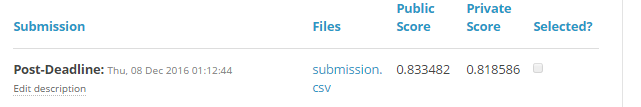

In [1]:
from IPython.display import Image
Image(filename='submission.png') 